                                         בסייד

In [2]:
import pandas as pd
import numpy as np

hr_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/diplom/HR.csv')

1.satisfaction_level​ - Уровень удовлетворенности работой

2.Last_evaluation ​- Время с момента последней оценки в годах

3.number_projects​ - Количество проектов, выполненных за время работы

4.average_monthly_hours​ - Среднее количество часов на рабочем месте в месяц

5.time_spend_company​ - Стаж работы в компании в годах

6.work_accident​ - Происходили ли несчастные случаи на рабочем месте с сотрудником

7.left​ - уволился ли сотрудник

8.promotion_last_5years​ - повышался ли сотрудник за последние пять лет

9.department ​- отдел в котором работает сотрудник

10.salary​ - относительный уровень зарплаты


In [3]:
# Рассчитайте основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение).
hr_df.describe()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [4]:
hr_df.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


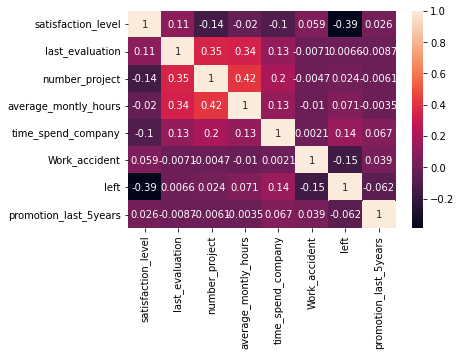

In [5]:
# Рассчитайте и визуализировать корреляционную матрицу дляколичественных переменных.
# Определите две самые скоррелированные и две наименее скоррелированные переменные.

import seaborn as sns

sns.heatmap(hr_df.corr(), annot=True);

две самые скоррелированные переменные - satisfaction_level	и left

две наименее скоррелированные переменные - time_spend_company и Work_accident

In [6]:
# количество сотрудников в каждом департаменте
hr_df[['salary' , 'department']].groupby('department').count()

,salary
department,
IT,1227
RandD,787
accounting,767
hr,739
management,630
marketing,858
product_mng,902
sales,4140
support,2229


In [7]:
# распределение сотрудников по зарплатам.
hr_df[['salary' , 'department']].groupby('salary').count()

,department
salary,
high,1237
low,7316
medium,6446


In [8]:
# распределение сотрудников по зарплатам в каждом департаменте
hr_df[['salary' , 'department', 'left']].groupby(['department','salary']).count()

left
department  salary      
IT          high      83
            low      609
            medium   535
RandD       high      51
            low      364
            medium   372
accounting  high      74
            low      358
            medium   335
hr          high      45
            low      335
            medium   359
management  high     225
            low      180
            medium   225
marketing   high      80
            low      402
            medium   376
product_mng high      68
            low      451
            medium   383
sales       high     269
            low     2099
            medium  1772
support     high     141
            low     1146
            medium   942
technical   high     201
            low     1372
            medium  1147

Статистика=0.762, p=0.446
Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые
Сотрудники и с высоким и с низким окладом в среднем проводят одинаковое количество времени на работе


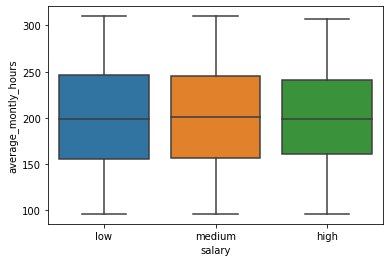

In [9]:
# Проверим гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

import scipy.stats as st

low = list(hr_df.loc[hr_df['salary'] == 'low']['average_montly_hours'])
high = list(hr_df.loc[hr_df['salary'] == 'high']['average_montly_hours'])

sns.boxplot(x="salary", y="average_montly_hours", data=hr_df[['salary', 'average_montly_hours']])

stat, p = st.ttest_ind(low, high, equal_var=False)
print('Статистика=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
    print('Сотрудники и с высоким и с низким окладом в среднем проводят одинаковое количество времени на работе')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')
    print('Сотрудники  с высоким и с низким окладом в среднем проводят статистически значимо разное количество времени на работе')


In [10]:
# Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников
# ●Доля сотрудников с повышением за последние 5 лет
# ●Средняя степень удовлетворенности
# ●Среднее количество проектов

for i in [0,1]:
  share = round((hr_df.loc[hr_df['left'] == i]['promotion_last_5years'].sum()/
                 hr_df.loc[hr_df['left'] == i]['promotion_last_5years'].count()), 4)

  satisfaction = round(hr_df.loc[hr_df['left'] == i]['satisfaction_level'].mean(), 2)

  project = round(hr_df.loc[hr_df['left'] == i]['number_project'].mean(), 2)

  if i == 1:
    print()
    print('Уволившиеся сотрудники:')
    print(f'Доля сотрудников с повышением за последние 5 лет :{share}')
    print(f'Средняя степень удовлетворенности :{satisfaction}')
    print(f'Среднее количество проектов :{project}')
  
  else:
    print('Неуволившиеся сотрудники')
    print(f'Доля сотрудников с повышением за последние 5 лет :{share}')
    print(f'Средняя степень удовлетворенности  :{satisfaction}')
    print(f'Среднее количество проектов  :{project}')

Неуволившиеся сотрудники
Доля сотрудников с повышением за последние 5 лет :0.0263
Средняя степень удовлетворенности  :0.67
Среднее количество проектов  :3.79

Уволившиеся сотрудники:
Доля сотрудников с повышением за последние 5 лет :0.0053
Средняя степень удовлетворенности :0.44
Среднее количество проектов :3.86


In [35]:
# Разделить данные на тестовую и обучающую выборки
# Построить модель LDA, предсказывающую уволился лисотрудник на основе имеющихся факторов (кроме department и salary)
# Оценить качество модели на тестовой выборки

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X = hr_df.loc[:, ~hr_df.columns.isin(['department','salary', 'left'])]
y = hr_df['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [36]:
# матрица путаницы
cnf_matrix = metrics. confusion_matrix (y_test, y_pred)
cnf_matrix

array([[2645,  194],
       [ 674,  237]])

Истинно положительных предсказаний: 2645

Истинно отрицательные прогнозы: 237

Ложноположительные прогнозы: 674

Ложноотрицательные прогнозы: 194

In [37]:
print(f'Коэффициент детерминации модели :{model.score(X_test,y_test)}')

Коэффициент детерминации модели :0.7685333333333333


модель сделала правильный прогноз в 76,8 % случаев

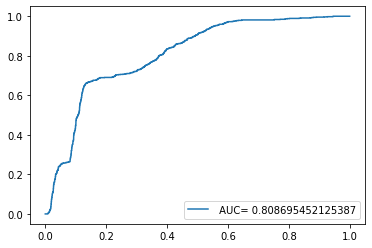

In [38]:
# построим кривую ROC
y_pred_proba = model. predict_proba (X_test)[::,1]
fpr, tpr, _ = metrics. roc_curve (y_test, y_pred_proba)
auc = metrics. roc_auc_score (y_test, y_pred_proba)

plt.plot (fpr,tpr,label=" AUC= "+str(auc))
plt.legend(loc=4)
plt.show()